In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
# file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
file2 = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
syscov = np.loadtxt('/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))

data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)
errors = np.diag(syscov).reshape(31,1)
np.shape(errors)

(31, 1)

In [3]:
shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
errors = errors[shuffle]
# data

In [4]:
z = data[:,0]
dl = data[:,1:]
np.shape(dl), np.shape(errors)

((31, 1), (31, 1))

In [5]:
# scalerz = StandardScaler()
# # scalerz = MinMaxScaler(feature_range=(-1,1))
# # fit scaler on data
# scalerz.fit(z.reshape(-1,1))
# # apply transform
# z = scalerz.transform(z.reshape(-1,1))

In [6]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
# scalerdl = StandardScaler()
scalerdl = MinMaxScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# errors_train, errors_test = np.split(errors, indx)
z_train, z_test = np.split(z, indx)
# dl_train, dl_test = np.split(dll, indx)
y = np.concatenate((dll, errors), axis=1)
np.shape(y)
y_train, y_test = np.split(y, indx)
# dl_train, dl_test = np.split(dll, indx)

In [7]:
# scalerdl.inverse_transform(dl_train.reshape(-1,1))
z_train

array([0.01      , 0.01383342, 0.01913635, 0.02647212, 0.03661999,
       0.05065797, 0.0700773 , 0.09694087, 0.13410237, 0.18550944,
       0.25662299, 0.35499736, 0.49108275, 0.67933539, 0.93975316,
       1.3       , 0.01176156, 0.01627025, 0.02250733, 0.03113533,
       0.04307081, 0.05958165, 0.08242181, 0.11401754])

In [8]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                    min_delta=0.0,
#                                    patience=100,
#                                    restore_best_weights=True)]

In [9]:
def model(input_z):
    efirst = Dense(200, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(efirst)
    x = Dense(200, activation='relu')(x)
    x = Dense(100, activation='relu')(x)

    elast = Dense(2, activation='linear')(x)
    return elast

batch_size = 1
epochs = 1000
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 101,102
Trainable params: 101,102
Non-trainable params: 0
_______________________________________________________

In [10]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.1474 - val_loss: 0.1025
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0286 - val_loss: 0.0811
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0103
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0079
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0321
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0133
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0141
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0037
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.013

24/24 [==============================] - 0s 1ms/step - loss: 7.7936e-04 - val_loss: 3.0585e-04
Epoch 80/1000
24/24 [==============================] - 0s 1ms/step - loss: 4.3625e-04 - val_loss: 1.0920e-04
Epoch 81/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.3607e-04 - val_loss: 1.0380e-04
Epoch 82/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.5881e-04 - val_loss: 2.3722e-04
Epoch 83/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.6914e-04 - val_loss: 2.1381e-04
Epoch 84/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.4170e-04 - val_loss: 5.5887e-05
Epoch 85/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.0295e-04 - val_loss: 3.4567e-04
Epoch 86/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.8040e-04 - val_loss: 1.3805e-04
Epoch 87/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.9194e-04 - val_loss: 8.9522e-04
Epoch 88/1000
24/24 [============

24/24 [==============================] - 0s 1ms/step - loss: 6.5595e-04 - val_loss: 1.6135e-04
Epoch 155/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.6706e-04 - val_loss: 9.5188e-05
Epoch 156/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0887e-04 - val_loss: 8.7808e-05
Epoch 157/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.2287e-04 - val_loss: 4.0284e-05
Epoch 158/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.5755e-04 - val_loss: 4.6571e-05
Epoch 159/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.8370e-04 - val_loss: 1.2774e-04
Epoch 160/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.8312e-04 - val_loss: 4.1773e-05
Epoch 161/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.1601e-04 - val_loss: 6.9258e-05
Epoch 162/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.9830e-04 - val_loss: 1.4921e-04
Epoch 163/1000
24/24 [===

Epoch 229/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.9525e-04 - val_loss: 1.7369e-04
Epoch 230/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.3700e-04 - val_loss: 4.6964e-05
Epoch 231/1000
24/24 [==============================] - 0s 1ms/step - loss: 4.5588e-05 - val_loss: 6.5385e-05
Epoch 232/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.0401e-04 - val_loss: 1.0828e-04
Epoch 233/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.6356e-04 - val_loss: 3.3445e-04
Epoch 234/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.8094e-04 - val_loss: 3.0833e-04
Epoch 235/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.8560e-04 - val_loss: 2.8927e-04
Epoch 236/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.1370e-04 - val_loss: 1.0375e-04
Epoch 237/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3666e-04 - val_loss: 1.2379e-04
Epoch 238/

Epoch 304/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.8133e-04 - val_loss: 7.1511e-05
Epoch 305/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.4140e-04 - val_loss: 7.5608e-05
Epoch 306/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.3718e-05 - val_loss: 1.4314e-04
Epoch 307/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.1236e-04 - val_loss: 1.2758e-04
Epoch 308/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.2100e-04 - val_loss: 6.2369e-05
Epoch 309/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3443e-04 - val_loss: 1.9137e-04
Epoch 310/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.6393e-04 - val_loss: 0.0021
Epoch 311/1000
24/24 [==============================] - 0s 1ms/step - loss: 4.6135e-04 - val_loss: 2.9698e-04
Epoch 312/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3154e-04 - val_loss: 1.1763e-04
Epoch 313/1000

Epoch 379/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 380/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 1.8435e-04
Epoch 381/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 6.3488e-05
Epoch 382/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.4993e-04 - val_loss: 2.6076e-04
Epoch 383/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.8072e-04 - val_loss: 1.3293e-04
Epoch 384/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.1721e-04 - val_loss: 6.7548e-05
Epoch 385/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.9075e-04 - val_loss: 1.1536e-04
Epoch 386/1000
24/24 [==============================] - 0s 1ms/step - loss: 5.5330e-05 - val_loss: 1.1386e-04
Epoch 387/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.4383e-04 - val_loss: 8.8950e-05
Epoch 388/1000
24/24 [====

24/24 [==============================] - 0s 1ms/step - loss: 2.6865e-04 - val_loss: 6.2686e-05
Epoch 454/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.9403e-04 - val_loss: 2.9665e-04
Epoch 455/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.4769e-04 - val_loss: 1.7195e-04
Epoch 456/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.8991e-04 - val_loss: 8.8335e-05
Epoch 457/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.2735e-04 - val_loss: 7.8868e-05
Epoch 458/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.5759e-04 - val_loss: 8.1427e-05
Epoch 459/1000
24/24 [==============================] - 0s 1ms/step - loss: 4.7747e-04 - val_loss: 3.2049e-04
Epoch 460/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.2344e-04 - val_loss: 3.9466e-04
Epoch 461/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.7036e-04 - val_loss: 5.7474e-05
Epoch 462/1000
24/24 [===

Epoch 528/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.6083e-04 - val_loss: 4.6394e-04
Epoch 529/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.4832e-04 - val_loss: 1.9118e-04
Epoch 530/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.2425e-04 - val_loss: 2.5058e-04
Epoch 531/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.8617e-04 - val_loss: 4.4395e-04
Epoch 532/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.0818e-04 - val_loss: 1.2124e-04
Epoch 533/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.5517e-04 - val_loss: 7.7104e-05
Epoch 534/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.3436e-04 - val_loss: 6.6594e-05
Epoch 535/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.7485e-04 - val_loss: 3.8126e-04
Epoch 536/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.7170e-04 - val_loss: 1.9303e-04
Epoch 537/

24/24 [==============================] - 0s 1ms/step - loss: 8.0936e-05 - val_loss: 1.7289e-04
Epoch 603/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3456e-04 - val_loss: 7.4343e-05
Epoch 604/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.1358e-05 - val_loss: 7.5792e-05
Epoch 605/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.0694e-04 - val_loss: 6.5950e-04
Epoch 606/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.6483e-04 - val_loss: 9.7891e-05
Epoch 607/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.9096e-04 - val_loss: 6.0324e-05
Epoch 608/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.7889e-04 - val_loss: 1.3465e-04
Epoch 609/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.5290e-04 - val_loss: 5.8682e-05
Epoch 610/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.2510e-04 - val_loss: 8.8459e-05
Epoch 611/1000
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 5.1502e-05 - val_loss: 2.3670e-05
Epoch 677/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.7722e-04 - val_loss: 7.1877e-05
Epoch 678/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.7395e-05 - val_loss: 1.2463e-04
Epoch 679/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0392e-04 - val_loss: 4.1261e-05
Epoch 680/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.5180e-04 - val_loss: 4.5581e-05
Epoch 681/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.9192e-05 - val_loss: 7.1673e-05
Epoch 682/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.8926e-04 - val_loss: 7.6776e-05
Epoch 683/1000
24/24 [==============================] - 0s 1ms/step - loss: 6.7140e-05 - val_loss: 1.2993e-04
Epoch 684/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0919e-04 - val_loss: 4.4874e-04
Epoch 685/1000
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 3.0613e-05 - val_loss: 5.1523e-05
Epoch 751/1000
24/24 [==============================] - 0s 2ms/step - loss: 7.0645e-05 - val_loss: 6.8582e-05
Epoch 752/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.7063e-05 - val_loss: 3.8944e-04
Epoch 753/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.9995e-04 - val_loss: 8.4803e-05
Epoch 754/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0874e-04 - val_loss: 4.9479e-04
Epoch 755/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.6041e-04 - val_loss: 2.3566e-04
Epoch 756/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.4513e-05 - val_loss: 3.1638e-05
Epoch 757/1000
24/24 [==============================] - 0s 1ms/step - loss: 5.2124e-05 - val_loss: 3.3342e-05
Epoch 758/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.8609e-04 - val_loss: 3.4749e-05
Epoch 759/1000
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 2.0302e-04 - val_loss: 2.5757e-05
Epoch 825/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.2861e-04 - val_loss: 1.4764e-04
Epoch 826/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3566e-04 - val_loss: 3.2625e-05
Epoch 827/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.3672e-04 - val_loss: 4.3804e-05
Epoch 828/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.2484e-04 - val_loss: 4.1400e-04
Epoch 829/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0257e-04 - val_loss: 4.6795e-05
Epoch 830/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.1125e-04 - val_loss: 6.4077e-05
Epoch 831/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.0690e-05 - val_loss: 4.8888e-05
Epoch 832/1000
24/24 [==============================] - 0s 1ms/step - loss: 5.0428e-05 - val_loss: 5.3109e-05
Epoch 833/1000
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 1.3357e-04 - val_loss: 9.4310e-05
Epoch 899/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0123e-04 - val_loss: 1.0379e-04
Epoch 900/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.6476e-04 - val_loss: 4.8141e-05
Epoch 901/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.1278e-04 - val_loss: 3.0398e-05
Epoch 902/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.3844e-05 - val_loss: 1.0951e-04
Epoch 903/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.2254e-05 - val_loss: 6.8747e-05
Epoch 904/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.4386e-04 - val_loss: 1.7266e-04
Epoch 905/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.1809e-04 - val_loss: 2.6474e-04
Epoch 906/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.9515e-04 - val_loss: 1.1170e-04
Epoch 907/1000
24/24 [===

24/24 [==============================] - 0s 1ms/step - loss: 9.6791e-05 - val_loss: 2.1660e-04
Epoch 973/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.6606e-04 - val_loss: 1.2579e-04
Epoch 974/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0936e-04 - val_loss: 7.7442e-05
Epoch 975/1000
24/24 [==============================] - 0s 1ms/step - loss: 6.3004e-05 - val_loss: 4.5349e-05
Epoch 976/1000
24/24 [==============================] - 0s 1ms/step - loss: 8.7097e-05 - val_loss: 4.8104e-05
Epoch 977/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.6563e-04 - val_loss: 2.8004e-04
Epoch 978/1000
24/24 [==============================] - 0s 1ms/step - loss: 2.1608e-04 - val_loss: 1.0424e-04
Epoch 979/1000
24/24 [==============================] - 0s 1ms/step - loss: 6.5195e-05 - val_loss: 8.2002e-05
Epoch 980/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.1176e-05 - val_loss: 1.1678e-04
Epoch 981/1000
24/24 [===

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

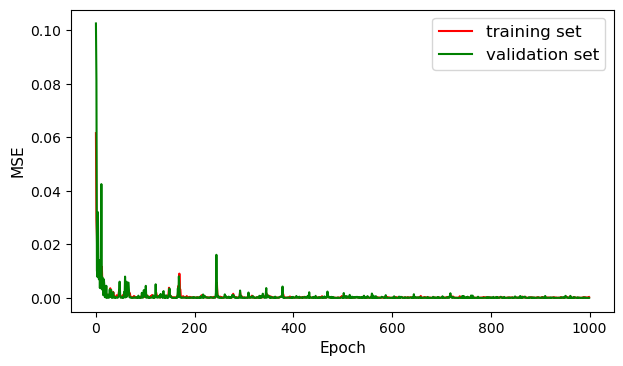

In [11]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [12]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]
# 300 ep (0.5874642133712769, 0.2920302748680115, 0.8262724280357361)
# 500 ep (0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

(0.00032070392626337707, 5.307931132847443e-05, 3.6847341107204556e-05)

In [13]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
ranz = z
# ranzz = ranz
# pred_random = neural_model.predict(ranz)
pred_random = neural_model.predict(ranz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1))
errfake = pred_random[:,1]
# dlfake = pred_random[:,0]

In [14]:
# fake_data = np.concatenate((z.reshape(-1,1), dl.reshape(-1,1)), axis=1, )
# fake_data = np.stack((ranz, dlfake.reshape(31,)), axis=1)
index = np.argsort(ranz)
fake_data = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)
# fake_data = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
# dl.reshape(31,)

array([32.95388698, 33.84214074, 34.59344598, 35.25209633, 36.06978761,
       36.65111059, 37.43017325, 38.25325404, 39.06785071, 39.79214362,
       40.56495606, 41.42141744, 42.23146107, 43.05273149, 43.97257341,
       44.82186746, 33.87900347, 34.11856704, 34.93902653, 35.74850165,
       36.43457047, 37.15801411, 37.95661635, 38.61286934, 39.3414019 ,
       40.1565346 , 40.90528778, 41.79092346, 42.61704707, 43.50415083,
       44.51408758])

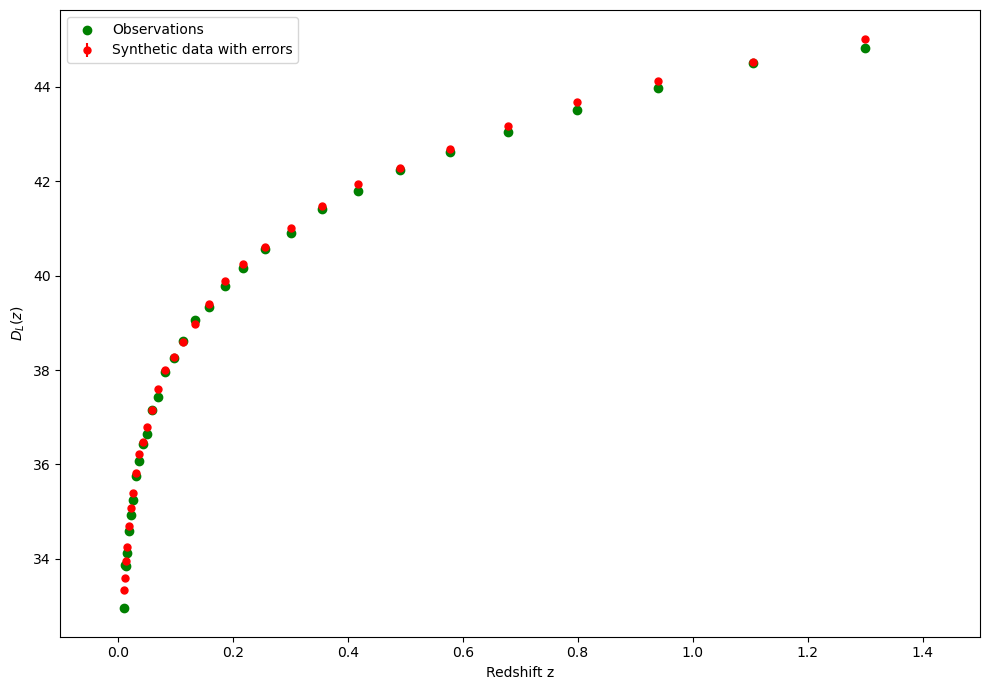

In [16]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(z, dl, c='g', label='Observations')
# plt.scatter(ranz, dlfake, c='r', label='Synthetic data', marker='*')
# plt.errorbar(z, dl, yerr=errors[:,1], fmt='g.', markersize=10, label='Observations')
plt.errorbar(z, dlfake, 
             yerr=errfake, fmt='r.', markersize=10., label='Synthetic data with errors')

# plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$D_L(z)$")
plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [17]:
neural_model.save('../models/FFNN_JLA2.h5')

In [22]:
np.min(np.abs(errors - errfake)), np.min(np.abs(errors))

(1.690004454158768e-06, 0.001006144079)

In [34]:
errors[index]

array([[0.02128262],
       [0.02815552],
       [0.00616208],
       [0.00523509],
       [0.00730352],
       [0.00315003],
       [0.00372933],
       [0.00322215],
       [0.00322574],
       [0.00564648],
       [0.00863066],
       [0.00385507],
       [0.00434009],
       [0.00298667],
       [0.00359204],
       [0.00140131],
       [0.00149105],
       [0.0012033 ],
       [0.001033  ],
       [0.00108647],
       [0.00100614],
       [0.00154152],
       [0.00112733],
       [0.00172396],
       [0.0015501 ],
       [0.00129206],
       [0.00394106],
       [0.00298022],
       [0.00446593],
       [0.02390228],
       [0.01916902]])

In [35]:
errfake[index]

array([ 1.9579906e-02,  1.5635241e-02,  7.0374738e-03,  4.5748102e-03,
        5.4181740e-03,  2.7267272e-03,  9.6827745e-04,  1.3398165e-03,
        2.4061948e-03,  2.9354831e-03,  3.2240460e-03,  2.9889690e-03,
        2.7084788e-03,  2.5518602e-03,  2.4903575e-03,  2.2541201e-03,
        1.9493150e-03,  1.5523480e-03,  1.0746000e-03,  7.2694290e-04,
        4.0662568e-04,  1.0338612e-05, -3.0579697e-04,  5.6883786e-04,
        1.1094408e-03,  1.7850595e-03,  2.6518786e-03,  3.6080489e-03,
        6.7693451e-03,  1.3394379e-02,  2.1180727e-02], dtype=float32)